In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import random
import os
import numpy as np

In [ ]:
# Cargar el archivo de datos
path = os.getcwd() + '/drive/My Drive/Colab Notebooks/RegistroTarjeta1_2023.csv'
print(path)
Registros = pd.read_csv(path)
Registros = Registros.dropna()
Registros

/content/drive/My Drive/Colab Notebooks/RegistroTarjeta1_2023.csv


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


<Axes: xlabel='Amount', ylabel='Class'>

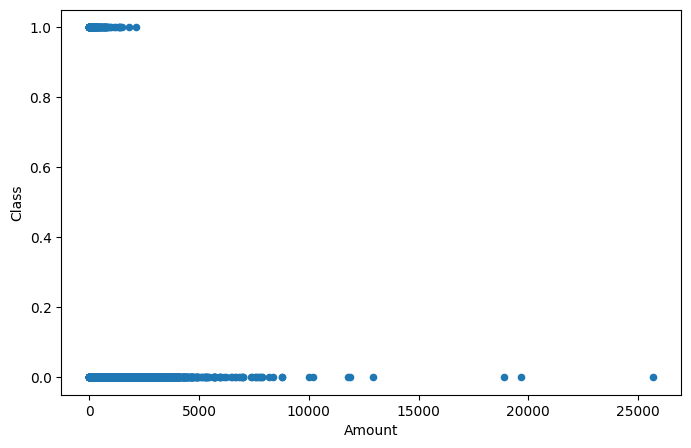

In [ ]:
Registros.plot(kind='scatter', x='Amount', y='Class', figsize=(8,5))

In [ ]:
# Organización de las columnas
Registros.columns = ['Time'] + [f'V{i}' for i in range(1, 29)] + ['Amount', 'Class']

In [ ]:
# Seleccionar características (X) y variable objetivo (y)
X = Registros[['Time', 'Amount'] + [f'V{i}' for i in range(1, 29)]]
y = Registros['Class']

# Crear un vector de características para la red neuronal
X_vector = X.values

In [ ]:
# Crear el modelo de red neuronal
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_dim=X_vector.shape[1], activation='sigmoid'))

model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])


# Entrenar el modelo
epochs_hist = model.fit(X_vector, y, epochs=50, validation_split=0.2)



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
7121/7121 [==============================] - 16s 2ms/step - loss: 2.7095 - accuracy: 0.9957 - val_loss: 0.0388 - val_accuracy: 0.9988
Epoch 2/50
7121/7121 [==============================] - 15s 2ms/step - loss: 0.7744 - accuracy: 0.9963 - val_loss: 0.3925 - val_accuracy: 0.9987
Epoch 3/50
7121/7121 [==============================] - 17s 2ms/step - loss: 0.6346 - accuracy: 0.9967 - val_loss: 1.9846 - val_accuracy: 0.9987
Epoch 4/50
7121/7121 [==============================] - 15s 2ms/step - loss: 0.6228 - accuracy: 0.9970 - val_lo

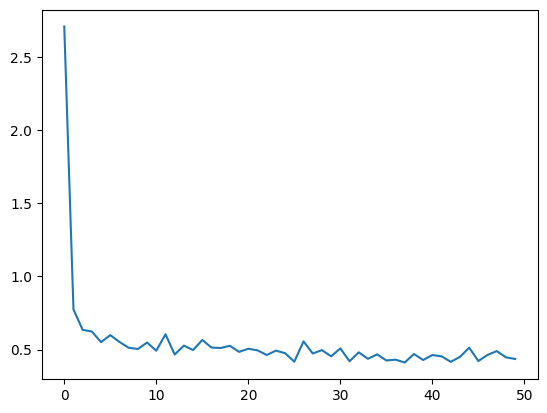

In [ ]:
epochs_hist.history.keys()
plt.plot(epochs_hist.history['loss'])

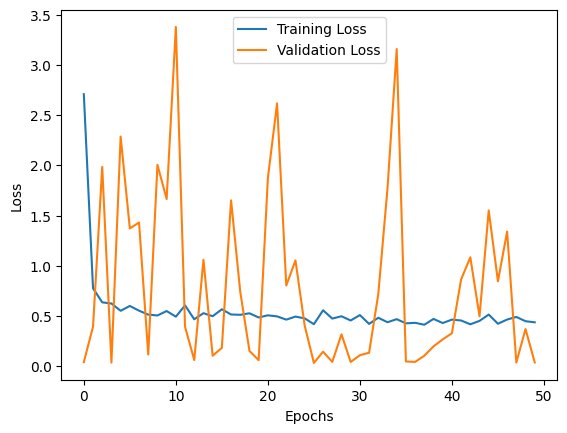

In [ ]:
# Visualizar el historial de pérdida
plt.plot(epochs_hist.history['loss'], label='Training Loss')
plt.plot(epochs_hist.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
# predicción de ejemplo
model.get_weights()
example_data = np.array([[9, 5] + [random.uniform(-5, 9) for _ in range(28)]])
prediction = model.predict(example_data)
print("Predicción del ejemplo:", "Fraud" if prediction[0][0] > 0.5 else "Not Fraud")

1/1 [==============================] - 0s 29ms/step
Predicción del ejemplo: Not Fraud


In [ ]:
# predicción de ejemplo para un fraude
model.get_weights()
ejemplo_fraude = [[9, 5] + [-4.5] * 28]
prediccion =  model.predict(ejemplo_fraude)
print("Predicción del ejemplo de fraude:", "Fraud" if prediccion[0] == 1 else "Not Fraud")

1/1 [==============================] - 0s 60ms/step
Predicción del ejemplo de fraude: Fraud
